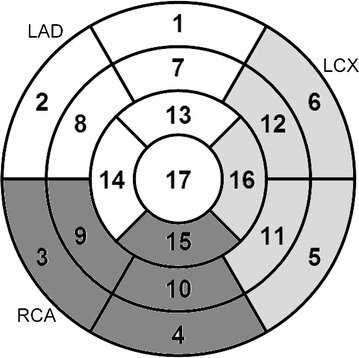

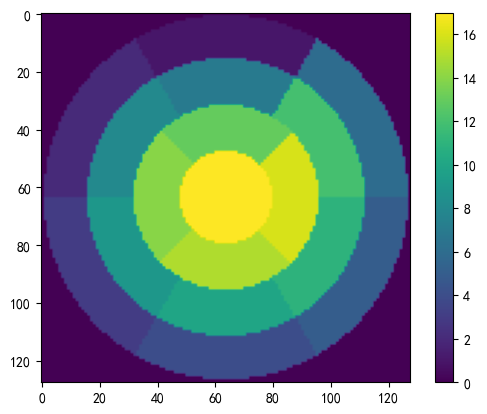

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def generate_bull_eye_array(size=128):
    """
    将分割的靶眼图映射到一个 size x size 的 ndarray。
    :param size: 输出数组的尺寸 (默认为 128x128)
    :return: 一个包含分割区域编号的 ndarray
    """
    # 创建一个空的数组，初始化为零
    array = np.zeros((size, size), dtype=int)

    # 定义圆心和半径范围
    center = size // 2
    radius_partitions = [0.25, 0.5, 0.75, 0.99]  # 四个圆环的归一化半径
    partitions = [1, 4, 6, 6]  # 每个环的分区数
    start_secs = [17, 13, 7, 1]  # 每个环的起始分区数字
    offset_angle = [0, 360-45, 360-60, 360-60]  # 每个环最小分区的下边缘与x轴的旋转角度

    # 将归一化半径转换为像素半径
    radius_pixels = [int(r * center) for r in radius_partitions]

    # 遍历每个像素点
    for y in range(size):
        for x in range(size):
            # 计算像素到中心点的距离和角度
            dx = x + 0.5 - center 
            dy = y + 0.5 - center
            distance = np.sqrt(dx**2 + dy**2)
            angle = np.degrees(np.arctan2(dy, dx)) % 360  # [0, 360)
            
            # 确定当前像素属于哪个圆环和扇形区域
            for i, (r_start, r_end) in enumerate(zip([0] + radius_pixels[:-1], radius_pixels)):
                if r_start <= distance < r_end:
                    # 计算角度范围的分区
                    theta_step = 360 / partitions[i]
                    region = int((angle+offset_angle[i])%360 // theta_step)
                    # print(distance, angle)
                    # print(theta_step, region)
                    array[y, x] = start_secs[i] + region
                    break
    return array

# 生成并绘制
size = 128
bull_eye_array = generate_bull_eye_array(size)

bull_eye_array = bull_eye_array[::-1]
plt.imshow(bull_eye_array)
plt.colorbar()
plt.show()

print(np.unique(bull_eye_array))

res_dir = r'./segment_img'
np.save(os.path.join(res_dir, 'segment17.npy'), bull_eye_array)


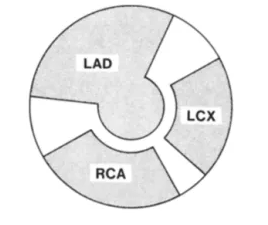

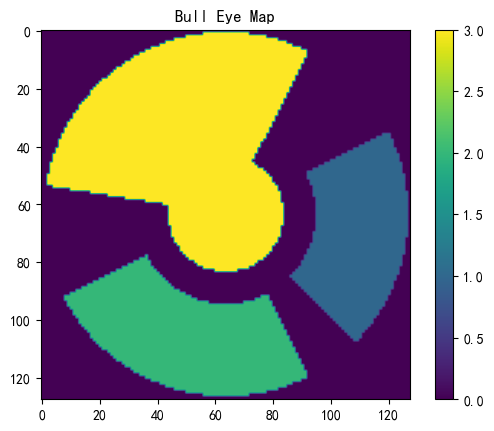

[0 1 2 3]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bull_eye_array(size=128):
    """
    将分割的靶眼图映射到一个 size x size 的 ndarray。
    :param size: 输出数组的尺寸 (默认为 128x128)
    :return: 一个包含分割区域编号的 ndarray
    """
    # 创建一个空的数组，初始化为零
    array = np.zeros((size, size), dtype=int)

    # 定义圆心和半径范围
    center = size // 2
    radius_partitions = [0.75 / 2.35, 1 - 1.05 / 2.05, 0.99]  # 四个圆环的归一化半径

    # 将归一化半径转换为像素半径
    r0, r1, r2 = [int(r * center) for r in radius_partitions]

    # 遍历每个像素点
    for y in range(size):
        for x in range(size):
            # 计算像素到中心点的距离和角度
            dx = x + 0.5 - center 
            dy = y + 0.5 - center
            distance = np.sqrt(dx**2 + dy**2)
            angle = np.degrees(np.arctan2(dy, dx)) % 360  # [0, 360)
            
            # LCX 333~45
            if r1 <= distance < r2 and (angle>=333 or angle < 45):
                array[y, x] = 1
            # RCA 63~153（90）
            elif r1 <= distance < r2 and 63<=angle<153:
                array[y, x] = 2
            # LAD 189~297（108）
            elif distance < r0 or (r0 <= distance < r2 and 189<=angle<297):
                array[y, x] = 3
                
    return array

# 生成并绘制
size = 128
bull_eye_array = generate_bull_eye_array(size)

# 绘制图像
plt.imshow(bull_eye_array, cmap="viridis")
plt.colorbar()
plt.title("Bull Eye Map")
plt.show()

# 打印数组中唯一的区域编号
print(np.unique(bull_eye_array))

np.save(os.path.join(res_dir, 'segment_coronary_artery.npy'), bull_eye_array)

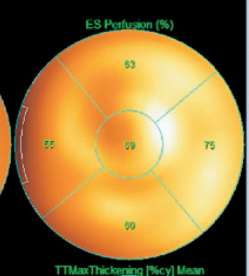

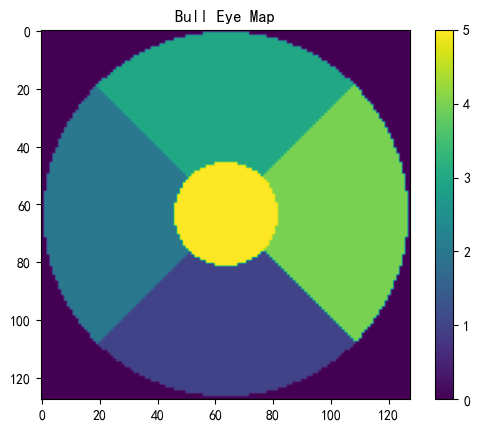

[0 1 2 3 4 5]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bull_eye_array(size=128):
    """
    将分割的靶眼图映射到一个 size x size 的 ndarray。
    :param size: 输出数组的尺寸 (默认为 128x128)
    :return: 一个包含分割区域编号的 ndarray
    """
    # 创建一个空的数组，初始化为零
    array = np.zeros((size, size), dtype=int)

    # 定义圆心和半径范围
    center = size // 2
    radius_partitions = [18/64, 0.99]  # 四个圆环的归一化半径

    # 将归一化半径转换为像素半径
    r0, r1 = [int(r * center) for r in radius_partitions]

    # 遍历每个像素点
    for y in range(size):
        for x in range(size):
            # 计算像素到中心点的距离和角度
            dx = x + 0.5 - center 
            dy = y + 0.5 - center
            distance = np.sqrt(dx**2 + dy**2)
            angle = np.degrees(np.arctan2(dy, dx)) % 360  # [0, 360)
            
            # center 5
            if distance < r0:
                array[y, x] = 5
            elif r0 <= distance < r1 and (45 <= angle < 135):
                array[y, x] = 1
            elif r0 <= distance < r1 and (135 <= angle < 225):
                array[y, x] = 2
            elif r0 <= distance < r1 and (225 <= angle < 315):
                array[y, x] = 3
            elif r0 <= distance < r1 and (angle >= 315 or  angle < 45):
                array[y, x] = 4
                
    return array

# 生成并绘制
size = 128
bull_eye_array = generate_bull_eye_array(size)

# 绘制图像
plt.imshow(bull_eye_array, cmap="viridis")
plt.colorbar()
plt.title("Bull Eye Map")
plt.show()

# 打印数组中唯一的区域编号
print(np.unique(bull_eye_array))

np.save(os.path.join(res_dir, 'segment_myocardial_wall.npy'), bull_eye_array)